In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male


In [2]:
data.describe()

,Unnamed: 0,Year
count,24570.000000,24570.000000
mean,12284.500000,1995.500000
std,7092.892393,12.121165
min,0.000000,1975.000000
25%,6142.250000,1985.000000
50%,12284.500000,1995.500000
75%,18426.750000,2006.000000
max,24569.000000,2016.000000


In [3]:
# Checking for missing values
data.isnull().sum()

Unnamed: 0     0
Country        0
Year           0
Obesity (%)    0
Sex            0
dtype: int64

In [4]:
# Taking only the numbers from the obesity columns, and replacing string values with nan
for i, o in enumerate(data.iloc[:, 3]):
    value = o[0:5]
    try:
        try:
            stripped = value.strip()
            data.iloc[:, 3][i] = float(stripped)
        except:
            data.iloc[:, 3][i] = float(value)
    except:
        try:
            stripped = value.strip()
            data.iloc[:, 3][i] = str(stripped)
        except:
            data.iloc[:, 3][i] = str(value)

data.iloc[:, 3] = pd.to_numeric(data.iloc[:, 3], errors='coerce')

In [5]:
# Filling missing values in the Obesity column with their mean
data.iloc[:, 3] = data.iloc[:, 3].fillna(data.iloc[:, 3].mean())
for i, o in enumerate(data.iloc[:, 3]):
    data.iloc[:, 3][i] = format(o, '.2f')
    
data.isnull().sum()

Unnamed: 0     0
Country        0
Year           0
Obesity (%)    0
Sex            0
dtype: int64

Text(0.5, 1.0, 'Distribution of Obesity')

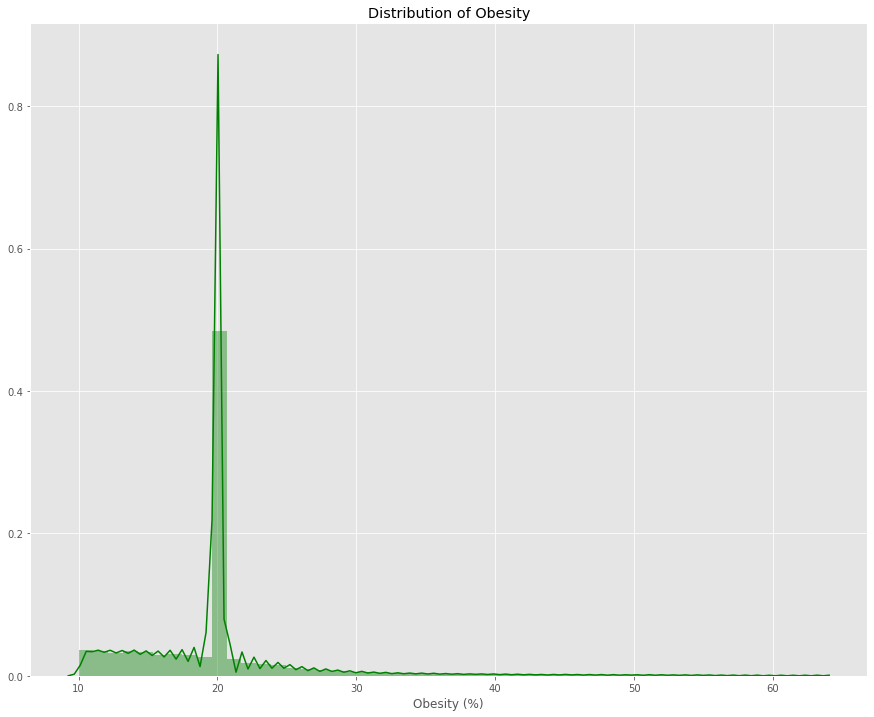

In [6]:
plt.figure(figsize=(15,12))
sns.distplot(data.iloc[:, 3], color='green').set_title('Distribution of Obesity')

Text(0.5, 1.0, 'Obesity over the years')

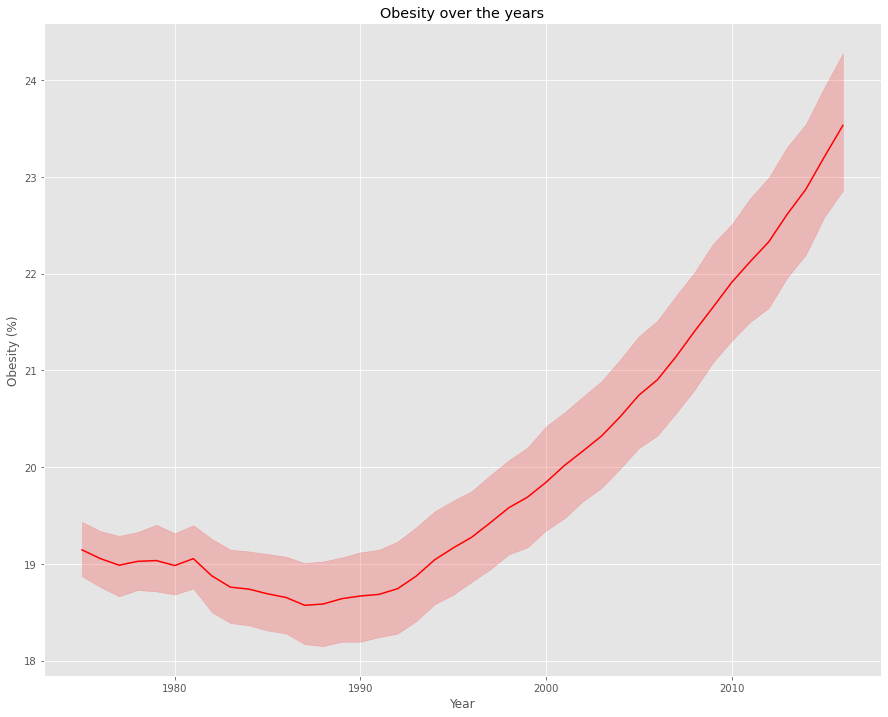

In [7]:
plt.figure(figsize=(15,12))
sns.lineplot(data['Year'] ,data.iloc[:, 3], color='red').set_title('Obesity over the years')

Text(0.5, 1.0, 'Obesity rate by Sex')

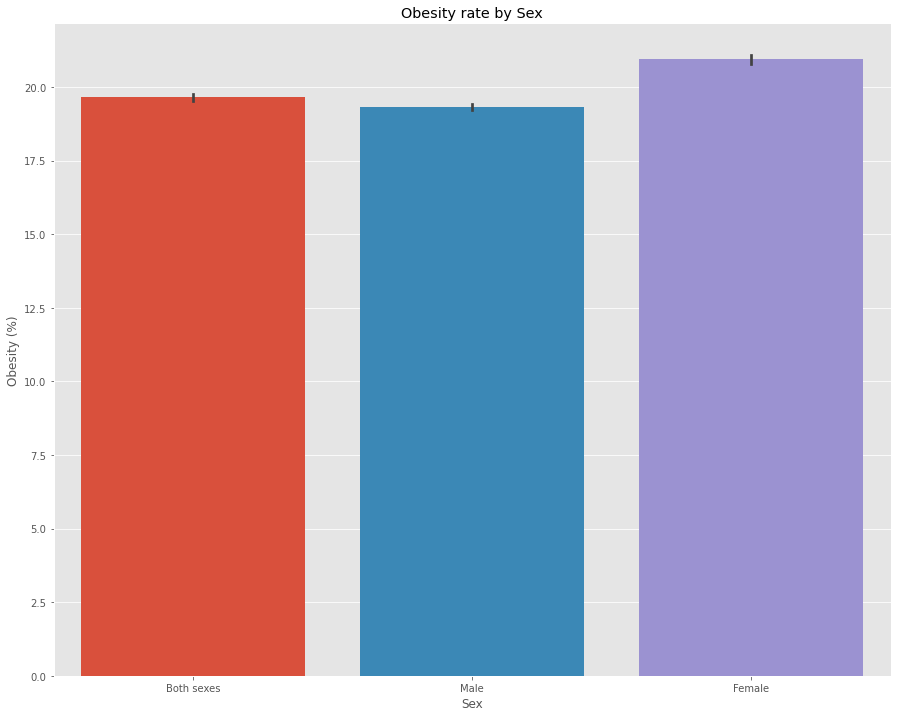

In [8]:
plt.figure(figsize=(15,12))
sns.barplot(data['Sex'], data.iloc[:, 3], saturation=0.9).set_title('Obesity rate by Sex')

Text(0.5, 1.0, 'Obesity rate by Country')

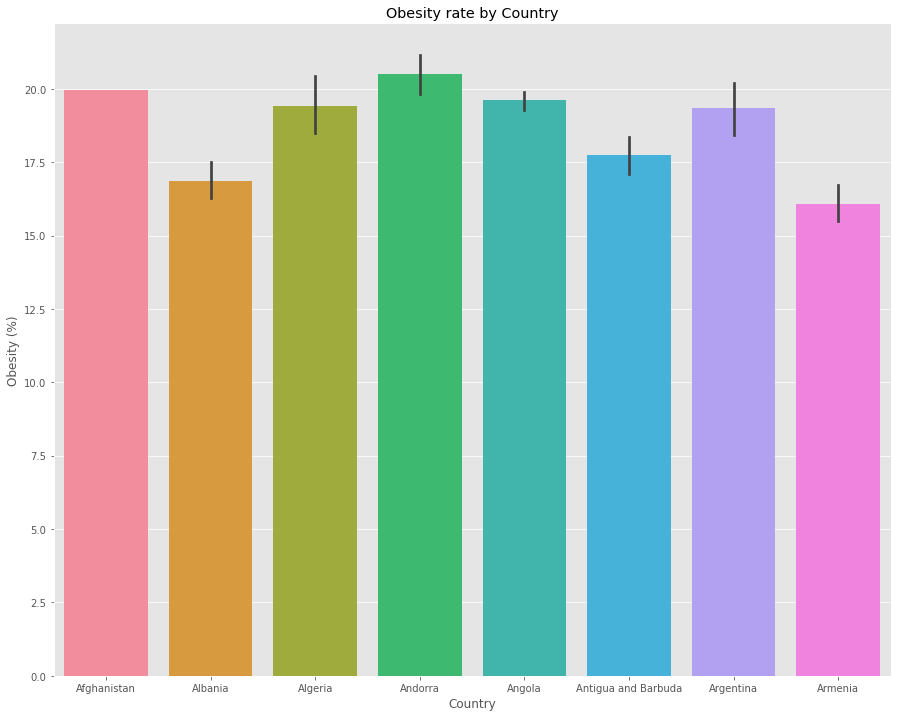

In [9]:
plt.figure(figsize=(15,12))
sns.barplot(data.iloc[:1000,1], data.iloc[:, 3], saturation=0.9).set_title('Obesity rate by Country')

Text(0.5, 1.0, 'Country count')

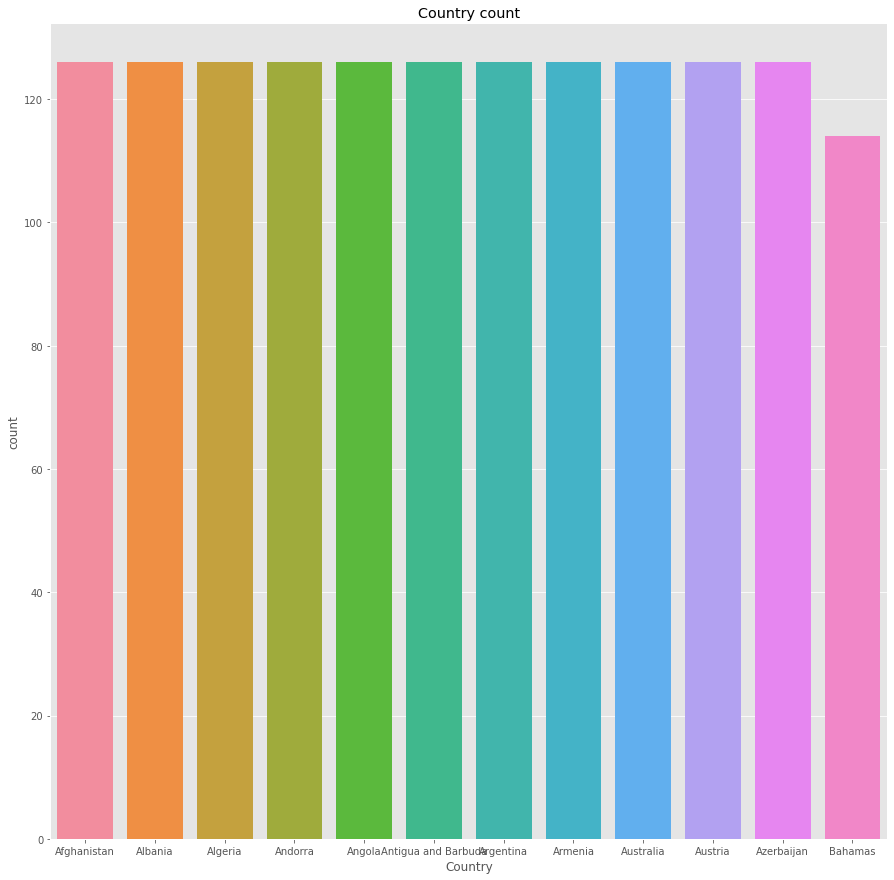

In [10]:
plt.figure(figsize=(15,15))
sns.countplot(data.iloc[:1500, 1], saturation=0.9).set_title('Country count')

Text(0.5, 1.0, 'Sex count')

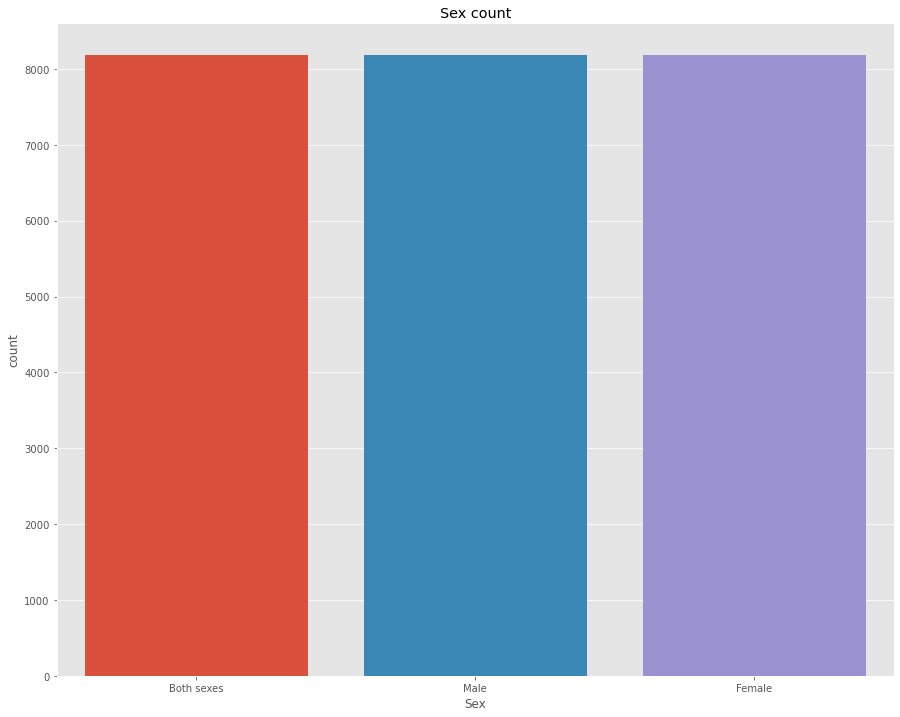

In [11]:
plt.figure(figsize=(15,12))
sns.countplot(data['Sex'], saturation=0.9).set_title('Sex count')

In [12]:
# Encoding categorical variables, and converting them to float64
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

categorical = data.select_dtypes(include='object')
categorical_col = categorical.columns

for column in categorical_col:
    data[column] = encoder.fit_transform(data[column])
    data[column] = data[column].astype('float64')
data['Year'] = data['Year'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24570 entries, 0 to 24569
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   24570 non-null  int64  
 1   Country      24570 non-null  float64
 2   Year         24570 non-null  float64
 3   Obesity (%)  24570 non-null  float64
 4   Sex          24570 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 959.9 KB


In [16]:
# Dropping the index column
data = data.drop(data.iloc[:, 0:1], 1)

In [17]:
# Splitting to dependant and independant
X = data.drop(data.iloc[:, 2:3], 1).values
y = data.iloc[:, 2].values

In [21]:
# Splitting to training set and testing/validation set
from sklearn.model_selection import KFold
kf = KFold()

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    
print(f'X_train shape: {X_train.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_test shape: {Y_test.shape}')

X_train shape: (19656, 2)
Y_train shape: (19656,)
X_test shape: (4914, 2)
Y_test shape: (4914,)


In [ ]:
# Fitting the data and evaluating
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

estimators = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(),
             SVR(), XGBRegressor()]

for model in estimators:
    model.fit(X_train, Y_train)
    accuracy = model.score(X_test, Y_test)
    
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    
    print(f'{model} Accuracy: {accuracy}')
    print(f'{model} MSE: {mse}')
    print('='*100)

LinearRegression() Accuracy: 0.0006325816197511047
LinearRegression() MSE: 0.6662449455868326
DecisionTreeRegressor() Accuracy: -0.27198603233927976
DecisionTreeRegressor() MSE: 0.8479906882261865
RandomForestRegressor() Accuracy: -0.12487496945817789
RandomForestRegressor() MSE: 0.749916646305452
